<a href="https://colab.research.google.com/github/misqualzarabi/DS-Unit-4-Sprint-1-NLP/blob/main/Vector_representations_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git

Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1457, done.
remote: Total 1457 (delta 0), reused 0 (delta 0), pack-reused 1457
Receiving objects: 100% (1457/1457), 26.82 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [4]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=7682a97351cc683fb495b8afc484000102951ebd3852af3c0e51fe1cb26cbcb9
  Stored in directory: /tmp/pip-ephem-wheel-cache-q6z3tqhu/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

data = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv"
df = pd.read_csv(data)
print(df.shape)
df.head()


                


(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
def clean_description(description):
  soup = BeautifulSoup(description, 'html.parser')
  return soup.get_text()

In [5]:
df['description'] = df['description'].apply(clean_description)
print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [9]:
#create tokenizing function with spacy
# set nlp equal to the trained vocabulary model
nlp = spacy.load('en_core_web_lg')

def tokenize(description):
  doc = nlp(description)
  return [token.lemma_.strip() for token in doc if (token.is_stop != True) & (token.is_punct != True) & (token.like_num != True)]

In [10]:
# test the tokenizing function on one description

tokenize(df['description'][0])

['b"Job',
 'requirements:\\nconceptual',
 'understanding',
 'Machine',
 'Learning',
 'model',
 'like',
 'nai\\xc2\\xa8ve',
 'Bayes',
 'K',
 'Means',
 'SVM',
 'Apriori',
 'Linear/',
 'Logistic',
 'Regression',
 'neural',
 'Random',
 'Forests',
 'decision',
 'Trees',
 'K',
 'NN',
 'hand',
 'experience',
 'them\\nintermediate',
 'expert',
 'level',
 'coding',
 'skill',
 'Python',
 'R.',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)\\nexposure',
 'package',
 'like',
 'NumPy',
 'SciPy',
 'Pandas',
 'Matplotlib',
 'etc',
 'Python',
 'GGPlot2',
 'dplyr',
 'tidyR',
 'R\\nAbility',
 'communicate',
 'Model',
 'finding',
 'Technical',
 'Non',
 'technical',
 'stake',
 'holders\\nhand',
 'experience',
 'SQL',
 'Hive',
 'similar',
 'programming',
 'language\\nmust',
 'past',
 'work',
 'GitHub',
 'Kaggle',
 'publish',
 'article\\nmaster',
 'degree',
 'Statistics',
 'Mathematics',
 'Computer',
 'Science',
 'quant',
 'specific',
 'field.\\na

In [11]:
# apply the tokenizing function on all description column

df['tokenized_description'] = df['description'].apply(tokenize)

In [12]:
print(df.shape)
df.head()

(426, 4)


,Unnamed: 0,description,title,tokenized_description
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, requirements:\nconceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, description\n\na, Data, scientist, hel..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, Data, scientist, work, consult, busines..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, $, monthcontractunder, general, sup..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [13]:
# instantiate the CountVectorizer
vect = CountVectorizer(tokenizer=tokenize, max_features=1000, strip_accents='ascii')

#fit the vector to our Vocab(data)
vect.fit(df['description'])

#get sparse document term Matrices(DTM)
dtm = vect.transform(df['description'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [14]:
# what is the shape of matrices
dtm.todense().shape

(426, 1000)

In [15]:
#what are some faetures

vect.get_feature_names()

['$',
 '+',
 '\\xe2\\x80\\x93',
 '\\xe2\\x80\\x94',
 'ability',
 'able',
 'academic',
 'accelerate',
 'accept',
 'access',
 'accommodation',
 'account',
 'accuracy',
 'accurate',
 'achieve',
 'acquisition',
 'act',
 'action',
 'actionable',
 'activity',
 'ad',
 'add',
 'addition',
 'additional',
 'address',
 'adoption',
 'advance',
 'advanced',
 'advantage',
 'advertising',
 'affirmative',
 'age',
 'agency',
 'agile',
 'ai',
 'aim',
 'algorithm',
 'algorithmic',
 'allow',
 'alongside',
 'amazon',
 'americas',
 'amount',
 'analysis',
 'analyst',
 'analytic',
 'analytical',
 'analytics',
 'analyze',
 'ancestry',
 'and/or',
 'anomaly',
 'answer',
 'app',
 'applicable',
 'applicant',
 'application',
 'applied',
 'apply',
 'approach',
 'appropriate',
 'architect',
 'architecture',
 'area',
 'art',
 'articulate',
 'artificial',
 'ask',
 'aspect',
 'assess',
 'asset',
 'assign',
 'assist',
 'assistance',
 'associate',
 'attention',
 'audience',
 'autodesk',
 'automate',
 'automation',
 'avail

In [16]:
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_df.head()

,$,+,\xe2\x80\x93,\xe2\x80\x94,ability,able,academic,accelerate,accept,access,accommodation,account,accuracy,accurate,achieve,acquisition,act,action,actionable,activity,ad,add,addition,additional,address,adoption,advance,advanced,advantage,advertising,affirmative,age,agency,agile,ai,aim,algorithm,algorithmic,allow,alongside,...,venture,verbal,veteran,video,view,vision,visit,visual,visualization,visualize,voice,volume,walmart,want,warehouse,way,we\'re,we\xe2\x80\x99re,web,week,welcome,well,wellness,wide,work,workflow,workforce,working,workplace,world,world\xe2\x80\x99s,worldwide,write,writing,year,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll,||
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4,0,0,0,0,2,0,0,2,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
count_df = pd.DataFrame(dtm.sum(axis=0), columns=vect.get_feature_names())
count_df = count_df.T.sort_values(by=0, ascending=False)
count_df

,0
datum,2934
work,1369
data,1270
team,1199
business,1171
...,...
price,20
interface,19
dedicate,19
ask,19


## 4) Visualize the most common word counts

In [18]:
top15 = count_df.reset_index()[1:15]

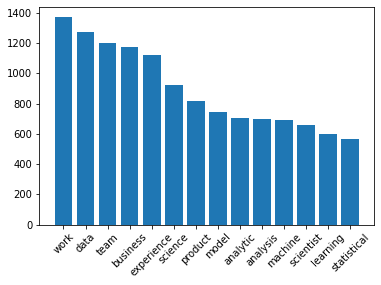

In [19]:
plt.bar(x=top15['index'], height=top15[0])
plt.xticks(rotation=45)
plt.show()

In [20]:
!pip install squarify

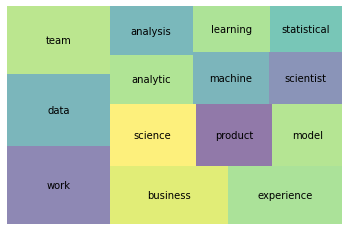

In [21]:
import squarify
squarify.plot(label=top15['index'], sizes=top15[0], alpha=.6)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [24]:
#instantiate vectorize object

tfidf = TfidfVectorizer(ngram_range=(1,3), tokenizer=tokenize, max_df=.97, min_df=.05)

dtm = tfidf.fit_transform(df['description'])

In [25]:
dtm.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.04201787, 0.04556909, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.07848864, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [26]:
dtm_tfidf_df = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
print(dtm_tfidf_df.shape)
dtm_tfidf_df.head()

(426, 1102)


,$,+,+ year,+ year experience,\xe2\x80\x93,ability,ability work,able,academic,accelerate,accept,access,accommodation,accuracy,achieve,acquisition,action,action employer,actionable,actionable insight,activity,ad,ad hoc,add,addition,additional,address,advance,advanced,advanced analytic,advanced statistical,advantage,advertising,affirmative,affirmative action,affirmative action employer,age,agency,agile,ai,...,visualization tool,visualize,volume,want,way,we\'re,we\xe2\x80\x99re,web,week,welcome,welcome people,well,wide,work,work closely,work datum,work environment,work experience,work independently,work large,work team,workforce,workplace,world,world class,world\xe2\x80\x99s,world\xe2\x80\x99s large,write,write communication,write communication skill,write verbal,write verbal communication,year,year experience,year professional,year relevant,year work,years\xe2\x80\x99,york,you\xe2\x80\x99ll
0,0.000000,0.000000,0.000000,0.0,0.000000,0.082300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.052944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.091479,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.042018,0.045569,0.0,0.000000,0.038522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073988,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.141522,0.0,...,0.0,0.0,0.0,0.0,0.049269,0.0,0.071266,0.0,0.0,0.0,0.0,0.0,0.0,0.099125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0798,0.0,0.0,0.0,0.085636,0.0,0.0,0.0,0.0,0.030152,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.129751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.09903,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.113537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.252208,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.073653,0.096614,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08852,0.00000,0.0,0.0,0.0,0.0,0.094779,0.094779,0.096614,0.061972,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.059298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.036075,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.227492,0.246719,0.0,0.331556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.163249,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [27]:
from sklearn.neighbors import NearestNeighbors

#fit the nearestneighbors model on document term matrice
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [29]:
nn.kneighbors()

(array([[1.20109877, 1.20415807, 1.22038335, 1.23723454, 1.24059547],
        [1.15115574, 1.15436533, 1.15877309, 1.15937587, 1.1606522 ],
        [1.17620968, 1.19486614, 1.20061477, 1.21418896, 1.22138758],
        ...,
        [0.        , 1.16996466, 1.17088523, 1.17294658, 1.17294658],
        [0.        , 1.11440284, 1.12040706, 1.14259902, 1.14313315],
        [1.11007774, 1.12610548, 1.14123854, 1.14782574, 1.15838702]]),
 array([[403,  79, 327, 338, 222],
        [136, 331, 201, 285, 222],
        [307, 190,  51, 318, 331],
        ...,
        [ 44, 363, 244, 110, 132],
        [382, 201, 399, 162, 283],
        [213, 201, 383, 388, 406]]))

In [30]:
job_desc = [""" 
We are looking for a Data Scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven ability to drive business results with their data-based insights. They must be comfortable working with a wide range of stakeholders and functional teams. The right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes.

Responsibilities for Data Scientist
Work with stakeholders throughout the organization to identify opportunities for leveraging company data to drive business solutions.
Mine and analyze data from company databases to drive optimization and improvement of product development, marketing techniques and business strategies.
Assess the effectiveness and accuracy of new data sources and data gathering techniques.
Develop custom data models and algorithms to apply to data sets.
Use predictive modeling to increase and optimize customer experiences, revenue generation, ad targeting and other business outcomes.
Develop company A/B testing framework and test model quality.
Coordinate with different functional teams to implement models and monitor outcomes.
Develop processes and tools to monitor and analyze model performance and data accuracy.
Qualifications for Data Scientist
Strong problem solving skills with an emphasis on product development.
Experience using statistical computer languages (R, Python, SLQ, etc.) to manipulate data and draw insights from large data sets.
Experience working with and creating data architectures.
Knowledge of a variety of machine learning techniques (clustering, decision tree learning, artificial neural networks, etc.) and their real-world advantages/drawbacks.
Knowledge of advanced statistical techniques and concepts (regression, properties of distributions, statistical tests and proper usage, etc.) and experience with applications.
Excellent written and verbal communication skills for coordinating across teams.
A drive to learn and master new technologies and techniques.
We’re looking for someone with 5-7 years of experience manipulating data sets and building statistical models, has a Master’s or PHD in Statistics, Mathematics, Computer Science or another quantitative field, and is familiar with the following software/tools:
Coding knowledge and experience with several languages: C, C++, Java,
JavaScript, etc.
Knowledge and experience in statistical and data mining techniques: GLM/Regression, Random Forest, Boosting, Trees, text mining, social network analysis, etc.
Experience querying databases and using statistical computer languages: R, Python, SLQ, etc.
Experience using web services: Redshift, S3, Spark, DigitalOcean, etc.
Experience creating and using advanced machine learning algorithms and statistics: regression, simulation, scenario analysis, modeling, clustering, decision trees, neural networks, etc.
Experience analyzing data from 3rd party providers: Google Analytics, Site Catalyst, Coremetrics, Adwords, Crimson Hexagon, Facebook Insights, etc.
Experience with distributed data/computing tools: Map/Reduce, Hadoop, Hive, Spark, Gurobi, MySQL, etc.
Experience visualizing/presenting data for stakeholders using: Periscope, Business Objects, D3, ggplot, etc."""]

In [31]:
#transform on the new job desc with the fit tfid model

new_job = tfidf.transform(job_desc)

In [32]:
# what does the new job look like 
new_job

<1x1102 sparse matrix of type '<class 'numpy.float64'>'
	with 209 stored elements in Compressed Sparse Row format>

In [33]:
#get the 5 most nearest neighbors to this new job

nn.kneighbors(new_job.todense())

(array([[0.49317703, 0.82696065, 1.00291332, 1.00291332, 1.00567925]]),
 array([[327,  79, 153, 413, 209]]))

In [35]:
# inspect some of these descriptions to see how closely they match the new job description
df['description'][327]

"b'If you\\xe2\\x80\\x99re ready to innovate and help lead the development for Hewlett Packard Enterprise\\xe2\\x80\\x99s (HPE) Analytics Platform, come join us now! You will be part of an organization that is revolutionizing reporting solutions and architecting a data and analytics landscape that is simplified, modern, flexible and will ultimately enable HPE on its transformation journey and beyond.\\nJob Overview:\\nWe are looking for a Data Scientist who will support our product, sales, leadership and marketing teams with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 